In [64]:
import pandas as pd
import matplotlib.pyplot as plt

In [65]:
# Carregamento dos dados:

yt = pd.read_csv('capturas_03.07.youtube.csv')
dt = pd.read_csv('capturas_03.07.csv')

In [66]:
#Verificando os tipos de dados:
print('Tráfego do YouTube')
print(yt.dtypes)
print('-=' * 20)
print('Tráfego de dados')
print(dt.dtypes)

Tráfego do YouTube
No.              int64
Time           float64
Source          object
Destination     object
Length           int64
Protocol        object
Info            object
dtype: object
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Tráfego de dados
No.              int64
Time           float64
Source          object
Destination     object
Length           int64
Protocol        object
Info            object
dtype: object


In [67]:
yt.head

<bound method NDFrame.head of            No.         Time                              Source  \
0            1     0.000000  216.238.98.96.vultrusercontent.com   
1            2     0.000000  216.238.98.96.vultrusercontent.com   
2            3     0.000000  216.238.98.96.vultrusercontent.com   
3            4     0.000000  216.238.98.96.vultrusercontent.com   
4            5     0.000000  216.238.98.96.vultrusercontent.com   
...        ...          ...                                 ...   
421313  421314  4126.808494               RicardoNormando.local   
421314  421315  4128.063538               RicardoNormando.local   
421315  421316  4128.063625               RicardoNormando.local   
421316  421317  4128.802185               RicardoNormando.local   
421317  421318  4128.802221               RicardoNormando.local   

                  Destination  Length   Protocol  \
0       RicardoNormando.local     114  WireGuard   
1       RicardoNormando.local     160  WireGuard   
2       R

In [68]:
dt.head

<bound method NDFrame.head of            No.          Time                     Source  \
0            1      0.000000  fe80::3e52:a1ff:fec8:6a54   
1            2      0.102501  fe80::3e52:a1ff:fec8:6a54   
2            3      0.555328      RicardoNormando.local   
3            4      0.559813      RicardoNormando.local   
4            5      0.606983               98.98.19.178   
...        ...           ...                        ...   
319813  319814  17243.369200               98.98.19.178   
319814  319815  17244.007255  fe80::3e52:a1ff:fec8:6a54   
319815  319816  17244.109432  fe80::3e52:a1ff:fec8:6a54   
319816  319817  17244.344565      RicardoNormando.local   
319817  319818  17244.417926               98.98.19.178   

                  Destination  Length   Protocol  \
0                     ff02::1     150     ICMPv6   
1                     ff02::1     150     ICMPv6   
2                98.98.19.178     218  WireGuard   
3                98.98.19.178     218  WireGuard   
4

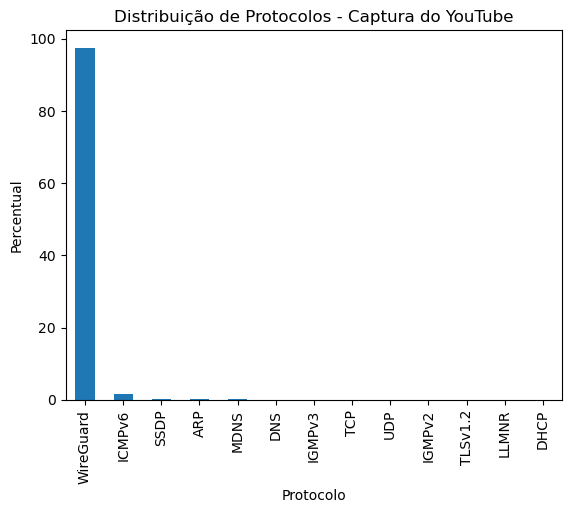

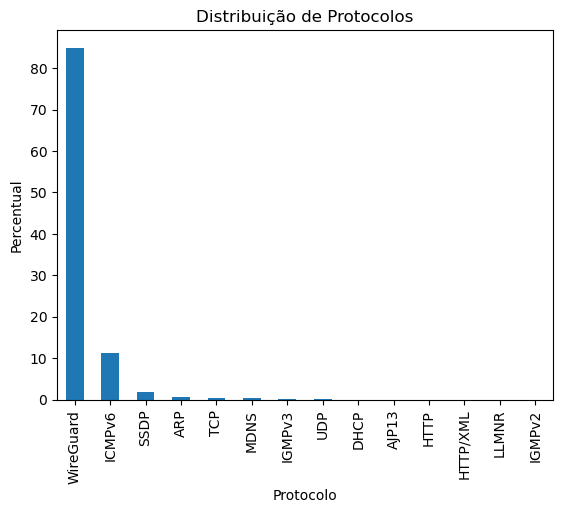

In [69]:
# Distribuição de Protocolos: Percentual de utilização de diferentes protocolos (TCP, UDP, ICMP, etc.).
# Tráfego do YouTube:
protocols_yt = yt['Protocol'].value_counts(normalize = True) * 100
protocols_yt.plot(kind = 'bar')
plt.title('Distribuição de Protocolos - Captura do YouTube')
plt.xlabel('Protocolo')
plt.ylabel('Percentual')
plt.show()

#Tráfego de dados:
protocols_dt = dt['Protocol'].value_counts(normalize = True) * 100
protocols_dt.plot(kind = 'bar')
plt.title('Distribuição de Protocolos')
plt.xlabel('Protocolo')
plt.ylabel('Percentual')
plt.show()

In [70]:
# Largura de Banda (Tráfego do YouTube)
bandwidth_yt = yt['Length'].sum()
print(f'Largura de Banda Utilizada: {bandwidth_yt/1000000} Mbytes')

# Largura de Banda (Tráfego de dados)
bandwidth_dt = dt['Length'].sum()
print(f'Largura de Banda Utilizada: {bandwidth_dt/1000000} Mbytes')

Largura de Banda Utilizada: 470.608251 Mbytes
Largura de Banda Utilizada: 145.81736 Mbytes


Tipos de dados após a conversão:
 No.                     int64
Time           datetime64[ns]
Source                 object
Destination            object
Length                  int64
Protocol               object
Info                   object
dtype: object
Volume de tráfego por minuto:
 Time
1970-01-01 00:00:00    12004003
1970-01-01 00:01:00     8165892
1970-01-01 00:02:00     4335421
1970-01-01 00:03:00     3322244
1970-01-01 00:04:00     3478327
                         ...   
1970-01-01 01:04:00    19826835
1970-01-01 01:05:00     8017031
1970-01-01 01:06:00     1620057
1970-01-01 01:07:00     3543628
1970-01-01 01:08:00       59605
Freq: T, Name: Length, Length: 69, dtype: int64


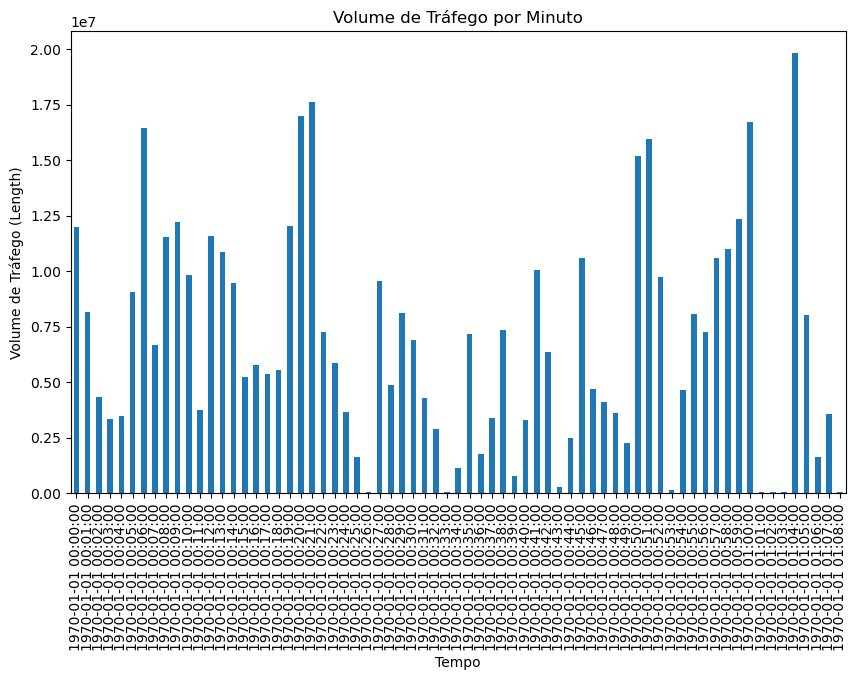

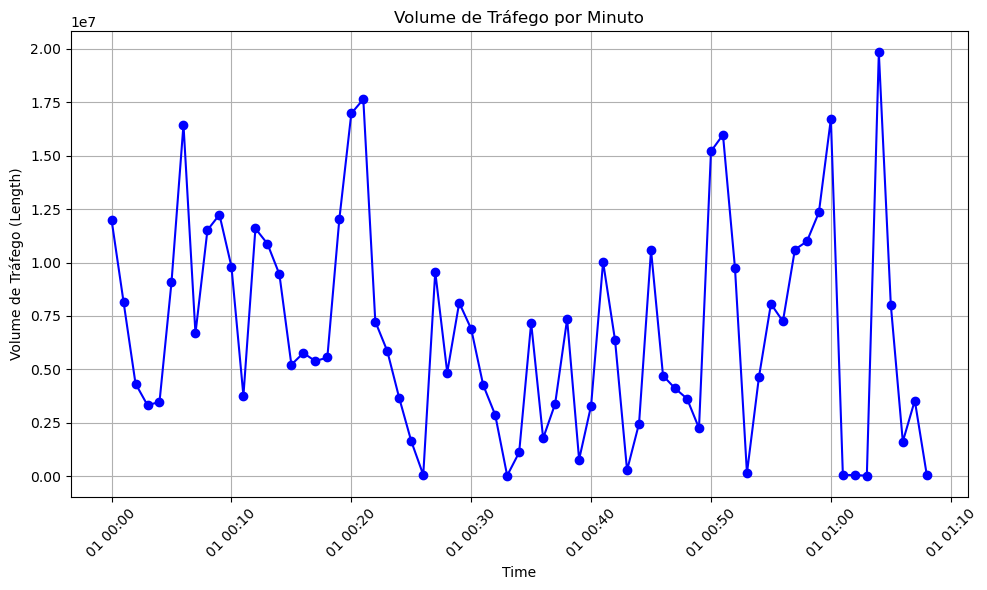

In [71]:
#Tráfego do YouTube
# Converter a coluna 'Time' de float para datetime
yt['Time'] = pd.to_datetime(yt['Time'], unit='s')

# Verificar os tipos de dados das colunas após a conversão
print("Tipos de dados após a conversão:\n", yt.dtypes)

# Definir a coluna 'Time' como índice
yt.set_index('Time', inplace=True)

# Reamostrar e somar os tamanhos dos pacotes em intervalos de 1 minuto
volume_yt = yt['Length'].resample('1Min').sum()
print("Volume de tráfego por minuto:\n", volume_yt)

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
volume_yt.plot(kind = 'bar')
plt.title('Volume de Tráfego por Minuto')
plt.xlabel('Tempo')
plt.ylabel('Volume de Tráfego (Length)')
plt.show()

# Plotar o gráfico de linhas
plt.figure(figsize=(10, 6))
plt.plot(volume_yt.index, volume_yt, marker='o', linestyle='-', color='b')
plt.title('Volume de Tráfego por Minuto')
plt.xlabel('Time')
plt.ylabel('Volume de Tráfego (Length)')
plt.grid(True)
plt.xticks(rotation = 45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.tight_layout()  # Ajusta o layout para evitar sobreposição de texto
plt.show()

Tipos de dados após a conversão:
 No.                     int64
Time           datetime64[ns]
Source                 object
Destination            object
Length                  int64
Protocol               object
Info                   object
dtype: object
Volume de tráfego por minuto:
 Time
1970-01-01 00:00:00      115084
1970-01-01 00:01:00     1148448
1970-01-01 00:02:00      224177
1970-01-01 00:03:00      129489
1970-01-01 00:04:00      121913
                         ...   
1970-01-01 04:43:00      481810
1970-01-01 04:44:00    10280089
1970-01-01 04:45:00      987982
1970-01-01 04:46:00      258407
1970-01-01 04:47:00      171662
Freq: T, Name: Length, Length: 288, dtype: int64


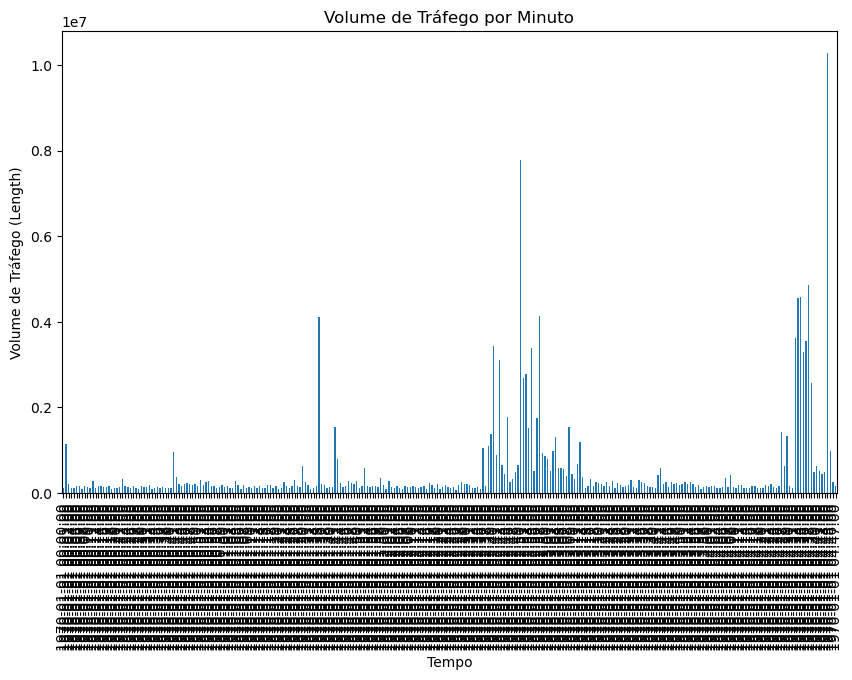

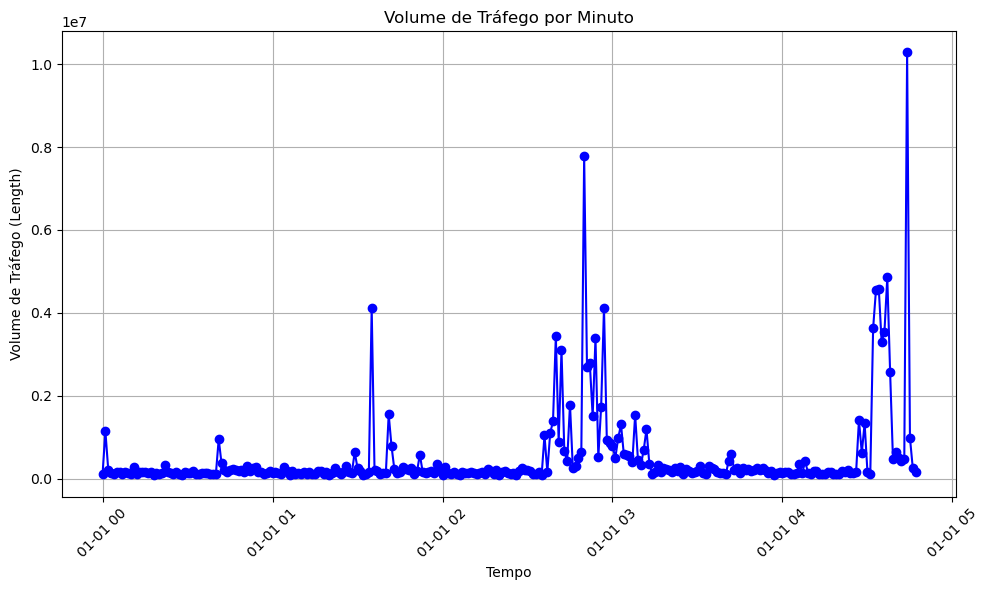

In [72]:
#Tráfego de dados
# Converter a coluna 'Time' de float para datetime
dt['Time'] = pd.to_datetime(dt['Time'], unit='s')

# Verificar os tipos de dados das colunas após a conversão
print("Tipos de dados após a conversão:\n", dt.dtypes)

# Definir a coluna 'Time' como índice
dt.set_index('Time', inplace = True)

# Reamostrar e somar os tamanhos dos pacotes em intervalos de 1 minuto
volume_dt = dt['Length'].resample('1Min').sum()
print("Volume de tráfego por minuto:\n", volume_dt)

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
volume_dt.plot(kind = 'bar')
plt.title('Volume de Tráfego por Minuto')
plt.xlabel('Tempo')
plt.ylabel('Volume de Tráfego (Length)')
plt.show()

# Plotar o gráfico de linhas
plt.figure(figsize=(10, 6))
plt.plot(volume_dt.index, volume_dt, marker='o', linestyle='-', color='b')
plt.title('Volume de Tráfego por Minuto')
plt.xlabel('Tempo')
plt.ylabel('Volume de Tráfego (Length)')
plt.grid(True)
plt.xticks(rotation = 45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.tight_layout()  # Ajusta o layout para evitar sobreposição de texto
plt.show()

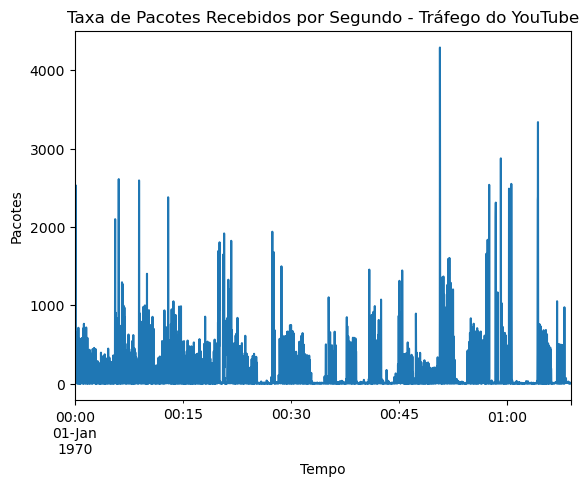

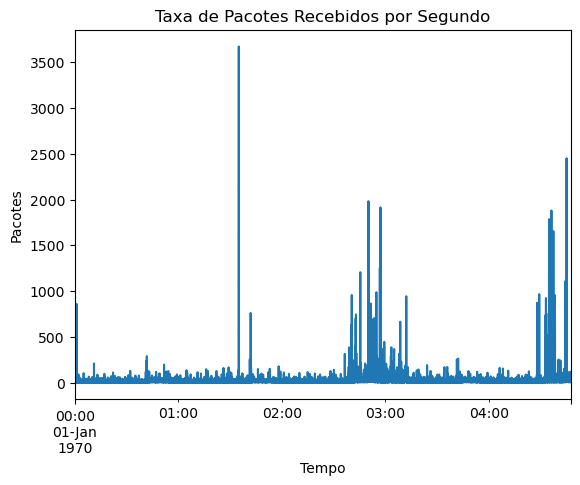

In [73]:
# Taxa de Pacotes Recebidos - Tráfego do YouTube
tx_rec = yt['No.'].resample('1S').count()
tx_rec.plot(kind='line')
plt.title('Taxa de Pacotes Recebidos por Segundo - Tráfego do YouTube')
plt.xlabel('Tempo')
plt.ylabel('Pacotes')
plt.show()

# Taxa de Pacotes Recebidos - Tráfego de dados
tx_rec_d = dt['No.'].resample('1S').count()
tx_rec_d.plot(kind='line')
plt.title('Taxa de Pacotes Recebidos por Segundo')
plt.xlabel('Tempo')
plt.ylabel('Pacotes')
plt.show()

0.0.0.0                                                     NaN
0e:0c:2d:56:ec:37                                           NaN
172.17.3.1                                                  NaN
177.37.220.17                                               NaN
192.168.0.1                                               210.0
192.168.0.2                                                 NaN
192.168.0.3                                                 NaN
192.168.0.4                                                 NaN
192.168.0.6                                                 NaN
192.168.0.9                                                 NaN
216.238.98.96.vultrusercontent.com                     410745.0
224.0.0.252                                                 NaN
239255255250                                                NaN
255255255255                                                NaN
2600:1901:1:7c5::                                           NaN
2804:29b8:1000:1::17                    

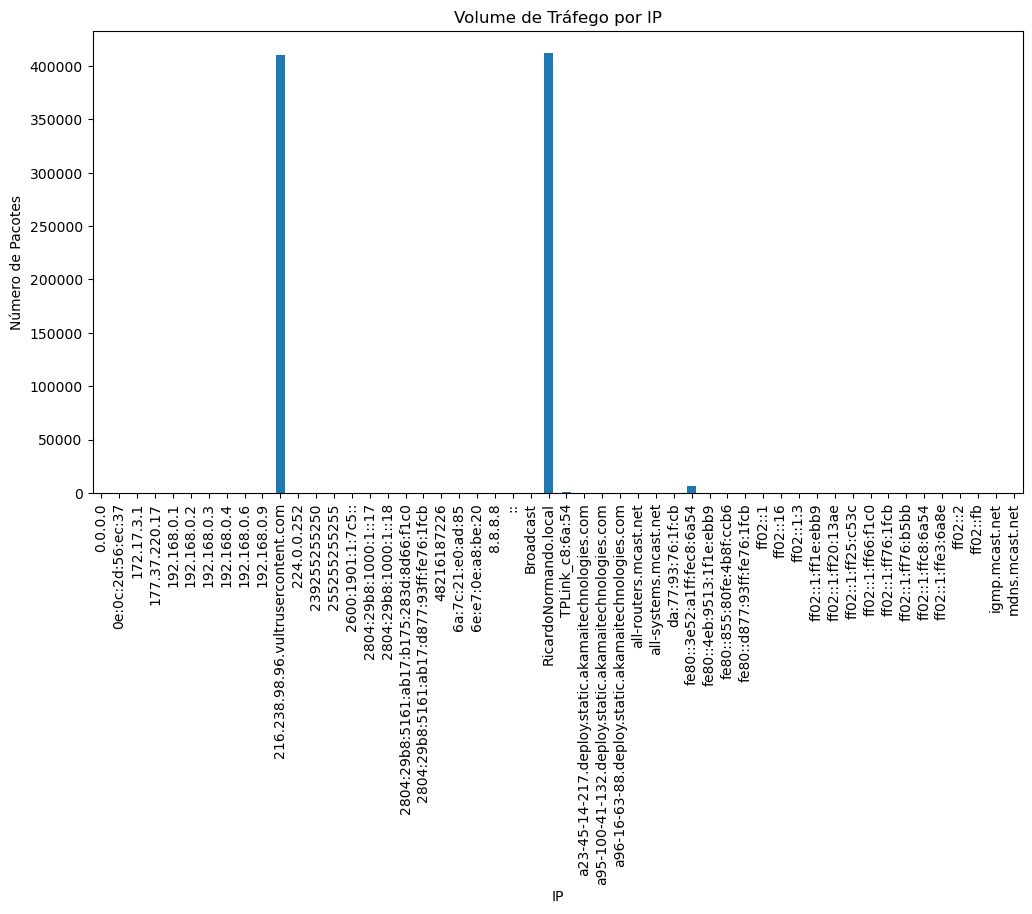

In [79]:
#Volume de tráfego por IP - Tráfego no Youtube
ip_traffic_yt = yt['Source'].value_counts() + yt['Destination'].value_counts()
print(ip_traffic_yt)
ip_traffic_yt.plot(kind='bar', figsize=(12, 6))
plt.title('Volume de Tráfego por IP - Tráfego do YouTube')
plt.xlabel('IP')
plt.ylabel('Número de Pacotes')
plt.show()

0.0.0.0                                            NaN
192.168.0.1                                     2501.0
192.168.0.2                                        NaN
192.168.0.3                                        NaN
192.168.0.6                                      258.0
192.168.0.9                                        NaN
224.0.0.252                                        NaN
239255255250                                       NaN
255255255255                                       NaN
2804:29b8:5161:ab17:3cf5:2cd8:41d2:ecb9            NaN
2804:29b8:5161:ab17:687c:21ff:fee0:ad85            NaN
2804:29b8:5161:ab17:741b:adff:fe97:c732            NaN
2804:29b8:5161:ab17:b175:283d:8d66:f1c0            NaN
2804:29b8:5161:ab17:d041:55de:3933:5b44            NaN
2804:29b8:5161:ab17:d877:93ff:fe76:1fcb            NaN
6a:7c:21:e0:ad:85                                 10.0
76:1b:ad:97:c7:32                                 79.0
7f4afdad-acad-44ec-22a7-1cf89865abb2.local      1617.0
98.98.19.1

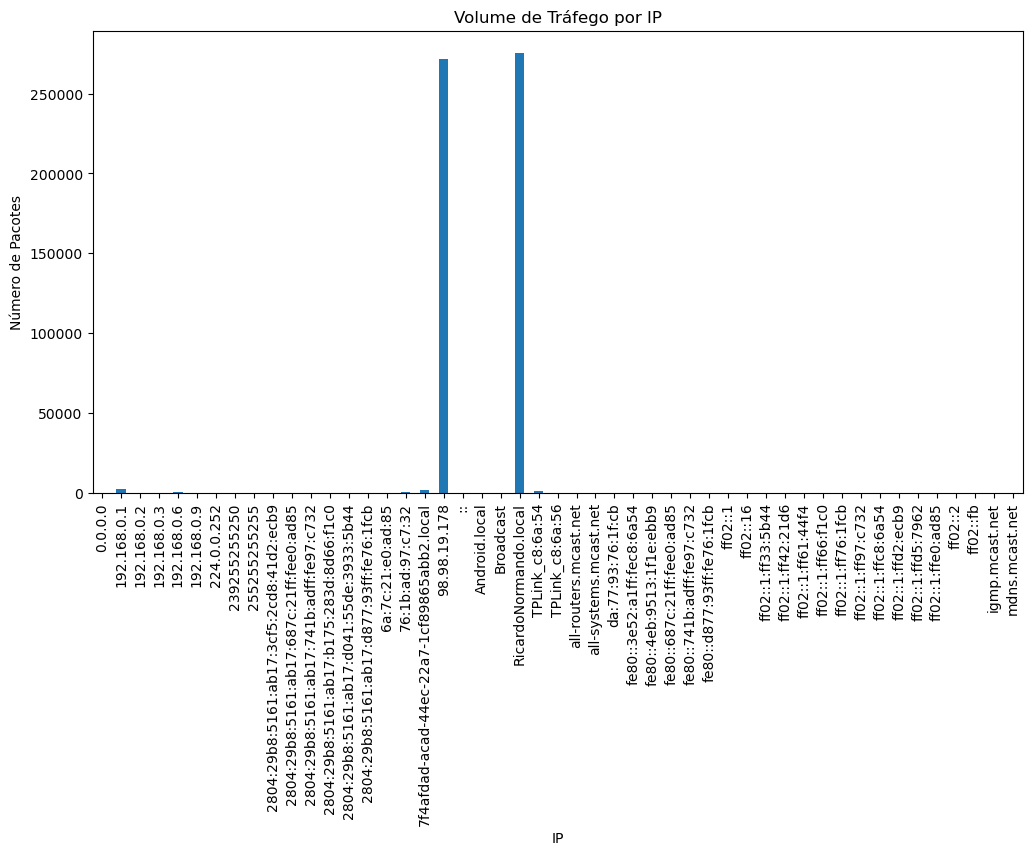

In [80]:
#Volume de tráfego por IP - Tráfego de dados
ip_traffic_dt = dt['Source'].value_counts() + dt['Destination'].value_counts()
print(ip_traffic_dt)
ip_traffic_dt.plot(kind='bar', figsize=(12, 6))
plt.title('Volume de Tráfego por IP')
plt.xlabel('IP')
plt.ylabel('Número de Pacotes')
plt.show()